# Fully Saturated VS Dynamic

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

figsize = (1.618*6, 6)

In [3]:
path = '../../data/processed/dynamic_twfe/beta_samples.csv'
dynamic_samples = pd.read_csv(path)
path = '../../data/processed/dynamic_twfe/beta_samples_summary.csv'
dynamic_df = pd.read_csv(path)
dynamic_df_smoothed = pd.read_csv('../../data/processed/dynamic_twfe/beta_smoothed.csv')
path = '../../data/processed/fully_saturated/weighted_beta_smoothed.csv'
fs_df = pd.read_csv(path)

In [68]:
class Plotter:
    def __init__(self, coef_data):
        self.coef_data = coef_data

    def plot(self, title=None, path=None, number=None):
        fig, ax = plt.subplots(figsize=figsize)
        fig.suptitle(f'図{number}: {title} 推定量', fontsize=16, y=0.93)
        sns.lineplot(x='ell', y='mean', data=self.coef_data, ax=ax, color='black', label=f'{title} 推定量')
        ax.fill_between(
            x=self.coef_data['ell'],
            y1=self.coef_data['mean'] - self.coef_data['sd'],
            y2=self.coef_data['sd'] + self.coef_data['mean'],
            alpha=0.3, label='1標準偏差区間', color='k'
        )
        ax.axvline(x=0, color='k', linestyle=':')
        ax.axhline(y=0, color='k', linestyle=':')
        ax.set_xlabel('経過年数')
        ax.set_ylabel('')
        ax.legend()
        if path:
            plt.savefig(path, bbox_inches='tight')

    def smoothed_plot(self, title=None, path=None, number=None):
        fig, ax = plt.subplots(figsize=figsize)
        fig.suptitle(f'図{number}: 平滑化 {title} 推定量', fontsize=16, y=0.93)
        sns.lineplot(x='ell', y='mean', data=self.coef_data, ax=ax, color='black', label=f'{title} 推定量', ls='--')
        ax.plot(
            self.coef_data['ell'],
            self.coef_data['smoothed_mean'],
            label=f'平滑化 {title} 推定量',
            color='k',
        )
        ax.fill_between(
            self.coef_data['ell'],
            y1=self.coef_data['state_smoothed_lwr_post'],
            y2=self.coef_data['state_smoothed_upr_post'],
            alpha=0.5, label='レベルの95%信用区間', color='k'
        )
        ax.fill_between(
            self.coef_data['ell'],
            y1=self.coef_data['mean'] - self.coef_data['sd'],
            y2=self.coef_data['sd'] + self.coef_data['mean'],
            alpha=0.3, label=f'{title} 推定量の1標準偏差区間', color='k'
        )
        ax.axvline(x=0, color='k', linestyle=':')
        ax.axhline(y=0, color='k', linestyle=':')
        ax.set_xlabel('経過年数')
        ax.set_ylabel('')
        ax.legend()
        if path:
            plt.savefig(path, bbox_inches='tight')

## Dynamic TWFE

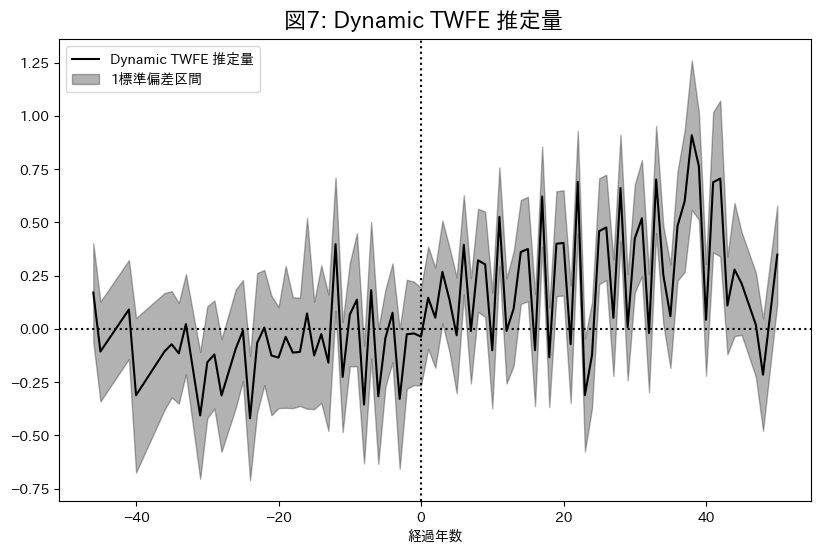

In [69]:
dynamic_plotter = Plotter(dynamic_df)
dynamic_plotter.plot(title='Dynamic TWFE', number=7, path='../../docs/figures/dynamic_twfe/ATT.png')

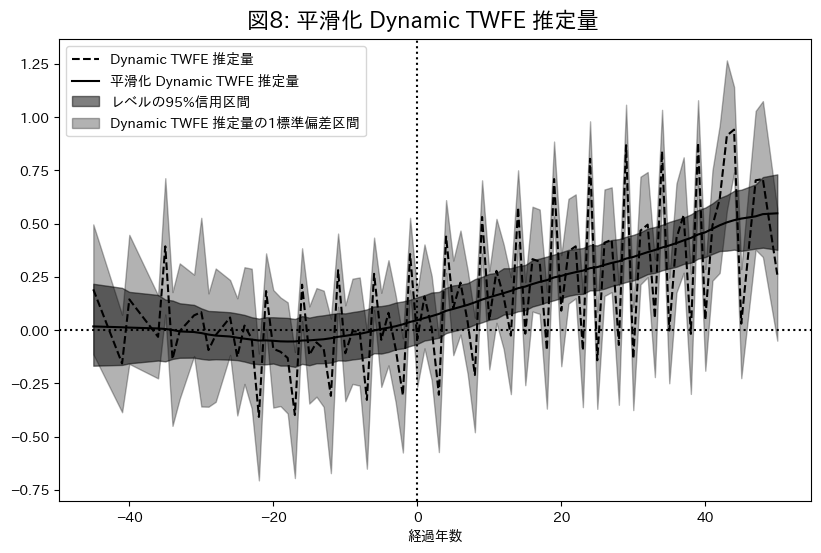

In [70]:
dynamic_plotter = Plotter(dynamic_df_smoothed)
dynamic_plotter.smoothed_plot(title='Dynamic TWFE', number=8, path='../../docs/figures/dynamic_twfe/smoothed_ATT.png')

In [71]:
min_mu = dynamic_df_smoothed['smoothed_mean'].min()
dynamic_df_smoothed.query(f'smoothed_mean == {min_mu}')

,Unnamed: 0,mean,sd,hdi_lwr,hdi_upr,ell,smoothed_mean,state_smoothed_lwr_post,state_smoothed_upr_post,obs_smoothed_lwr_post,obs_smoothed_upr_post
19,19,-0.131,0.261,-0.639,0.376,-18.0,-0.053864,-0.166871,0.056969,-0.522139,0.420635


## Fully Saturated TWFE

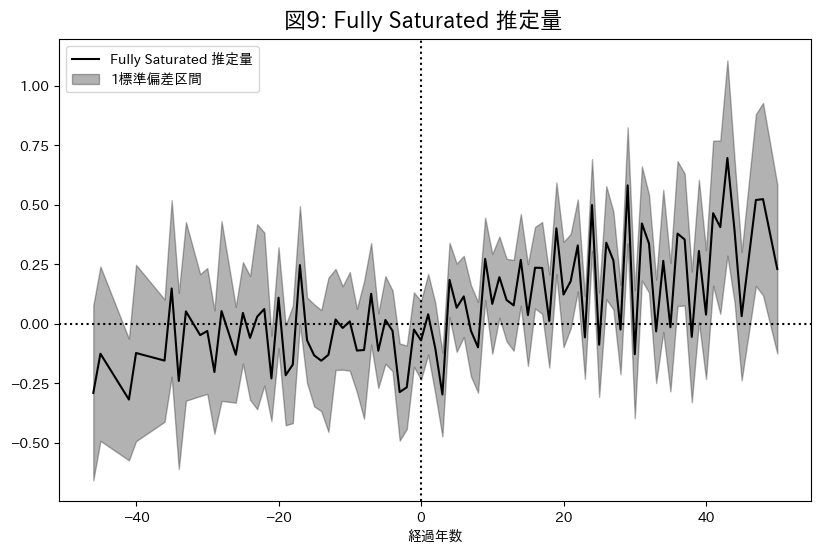

In [72]:
fully_saturated_plotter = Plotter(fs_df)
fully_saturated_plotter.plot(title='Fully Saturated', number=9, path='../../docs/figures/fully_saturated_twfe/ATT.png')

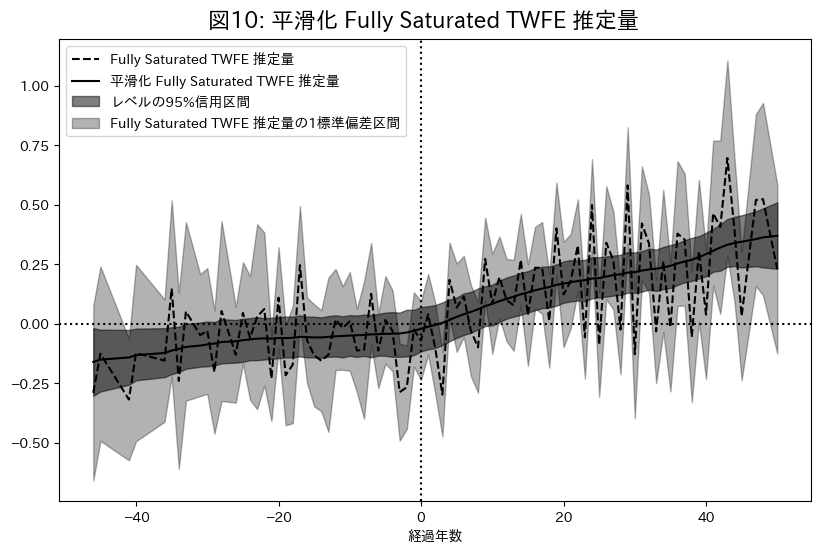

In [73]:
fully_saturated_plotter.smoothed_plot(title='Fully Saturated TWFE', number=10, path='../../docs/figures/fully_saturated_twfe/smoothed_ATT.png')

In [31]:
min_mu = fs_df.query('ell > -5')['smoothed_mean'].min()
fs_df.query(f'smoothed_mean == {min_mu}')

,Unnamed: 0,mean,sd,hdi_lwr,hdi_upr,ell,smoothed_mean,state_smoothed_lwr_post,state_smoothed_upr_post,obs_smoothed_lwr_post,obs_smoothed_upr_post
34,34,-0.030232,0.169767,-0.365188,0.297963,-4.0,-0.042357,-0.139467,0.048255,-0.408901,0.282494


## 比較

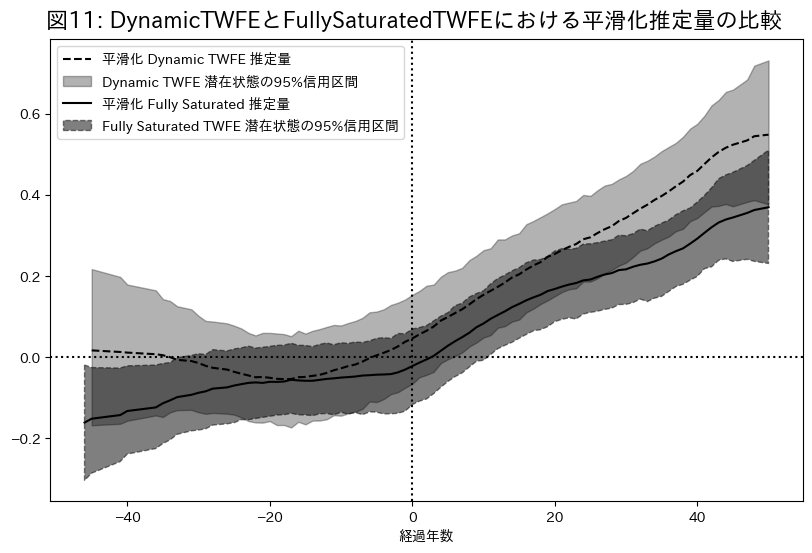

In [67]:
fig, ax = plt.subplots(figsize=figsize)
fig.suptitle('図11: DynamicTWFEとFullySaturatedTWFEにおける平滑化推定量の比較', fontsize=16, y=0.93)
sns.lineplot(x='ell', y='smoothed_mean', data=dynamic_df_smoothed, ax=ax, color='black', label='平滑化 Dynamic TWFE 推定量', ls='--')
ax.fill_between(
    dynamic_df_smoothed['ell'],
    y1=dynamic_df_smoothed['state_smoothed_lwr_post'],
    y2=dynamic_df_smoothed['state_smoothed_upr_post'],
    alpha=0.3, label='Dynamic TWFE 潜在状態の95%信用区間', color='k'
)

# sns.scatterplot(x='ell', y='mean', data=fs_df, ax=ax, color='black', label='Fully Saturated 推定量')
sns.lineplot(x='ell', y='smoothed_mean', data=fs_df, ax=ax, label='平滑化 Fully Saturated 推定量', color='k')
ax.fill_between(
    fs_df['ell'],
    y1=fs_df['state_smoothed_lwr_post'],
    y2=fs_df['state_smoothed_upr_post'],
    alpha=0.5, label='Fully Saturated TWFE 潜在状態の95%信用区間', color='k', ls='--'
)

ax.axvline(x=0, color='k', linestyle=':')
ax.axhline(y=0, color='k', linestyle=':')

ax.set_xlabel('経過年数')
ax.set_ylabel('')
ax.legend()

plt.savefig('../../docs/figures/fully_saturated_twfe/fs_vs_dynamic.png', bbox_inches='tight')

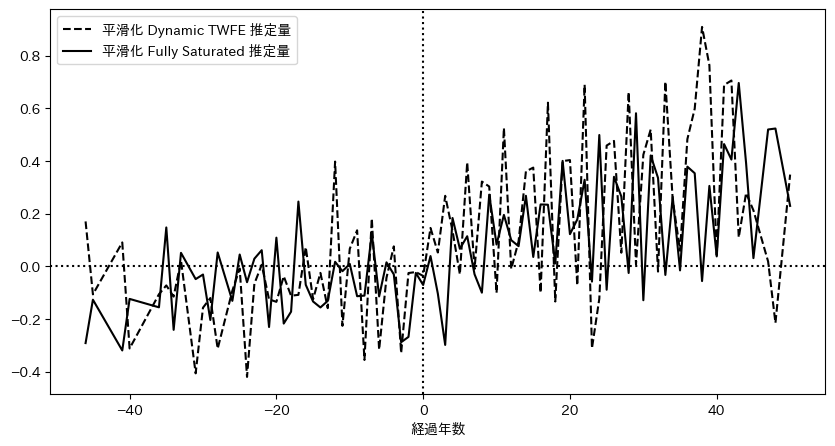

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
# sns.scatterplot(x='ell', y='mean', data=dynamic_df, ax=ax, color='black', label='Dynamic TWFE 推定量', marker='X')
sns.lineplot(x='ell', y='mean', data=dynamic_df, ax=ax, color='black', label='平滑化 Dynamic TWFE 推定量', ls='--')
# ax.fill_between(
#     dynamic_df['ell'],
#     y1=dynamic_df['hdi_lwr'],
#     y2=dynamic_df['hdi_upr'],
#     alpha=0.3, label='Dynamic TWFE 潜在状態の95%信用区間', color='k'
# )

# sns.scatterplot(x='ell', y='mean', data=fs_df, ax=ax, color='black', label='Fully Saturated 推定量')
sns.lineplot(x='ell', y='mean', data=fs_df, ax=ax, label='平滑化 Fully Saturated 推定量', color='k')
# ax.fill_between(
#     fs_df['ell'],
#     y1=fs_df['hdi_lwr'],
#     y2=fs_df['hdi_upr'],
#     alpha=0.5, label='Fully Saturated TWFE 潜在状態の95%信用区間', color='k', ls='--'
# )

ax.axvline(x=0, color='k', linestyle=':')
ax.axhline(y=0, color='k', linestyle=':')

ax.set_xlabel('経過年数')
ax.set_ylabel('')
ax.legend()